# 固有値・固有ベクトルの解釈・意味

## 線形代数的な解釈

いまいちど定義を振り返る

:::{admonition} 定義
:class: info

$n \in \mathbb{N}, A \in \mathbb{R}^{n\times n}, \boldsymbol{x} \in \mathbb{R}^n, \lambda \in \mathbb{R}$について

$$
A \boldsymbol{x} = \lambda \boldsymbol{x}
$$

が成り立つとき、スカラー$\lambda$を$A$の**固有値**（eigenvalue）といい、$\boldsymbol{x} (\neq \boldsymbol{0})$を$A$の$\lambda$に対応する**固有ベクトル**（eigenvector）と呼ぶ。
:::


定義より、線形変換$A \boldsymbol{x}$と、ベクトルの定数倍$\lambda \boldsymbol{x}$が等しい。つまり、

:::{tip}

線形変換$A \boldsymbol{x}$ をしたときに、向きは変わらず、大きさだけが$\lambda$倍に変わるようなベクトル$\boldsymbol{x}$が固有ベクトルで、その倍率$\lambda$が固有値
:::

と解釈できる。


## 統計学的な解釈

データを行列で表したときの話

学習データの分散が最大になる方向への線形変換を求める手法である **主成分分析** を例に考える。


::::{dropdown} 主成分分析
:class: info

$D$次元のデータ$\boldsymbol{x}=(x_1, \cdots, x_D)^T$が$N$個あるとする。$i$番目の観測値を行ベクトル$\boldsymbol{x}_i$として表し、データを行列$X = (\boldsymbol{x}_1, \cdots, \boldsymbol{x}_N)^T$と表す。

各変数の平均のベクトル$\bar{\boldsymbol{x}}=(\bar{x}_1, ..., \bar{x}_D)^T$を引き算した行列を$\bar{\boldsymbol{X}}=(\boldsymbol{x}_1 - \bar{\boldsymbol{x}}, ..., \boldsymbol{x}_N - \bar{\boldsymbol{x}})^T$とおけば、共分散行列$\boldsymbol{\Sigma}$は


$$
\boldsymbol{\Sigma} = \operatorname{Var}[\bar{\boldsymbol{X}}]
= \frac{1}{N} \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}}
$$

で定義される。

係数ベクトル$\boldsymbol{a}_j = (a_{j1}, ..., a_{jD})^T \ (j=1, ..., D)$を用いて$\bar{X}$を線形変換したベクトルを$\boldsymbol{s}_j$とする。

$$
\boldsymbol{s}_j = (s_{1j}, ..., s_{Nj})^T = \bar{\boldsymbol{X}} \boldsymbol{a}_j
$$

このデータの分散は

$$
\begin{aligned}
\operatorname{Var}[\boldsymbol{s}_j]
&= \frac{1}{N} \boldsymbol{s}_j^T \boldsymbol{s}_j\\
&= \frac{1}{N} (\bar{\boldsymbol{X}} \boldsymbol{a}_j)^T \bar{\boldsymbol{X}} \boldsymbol{a}_j\\
&= \frac{1}{N} \boldsymbol{a}_j^T \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}} \boldsymbol{a}_j\\
&= \boldsymbol{a}_j^T \operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j\\
\end{aligned}
$$

となる。

このまま$\max_{\boldsymbol{a}_j} \operatorname{Var}[\boldsymbol{s}_j]$を解くと単に$\boldsymbol{a}_j=\infty$が解になってしまうので、係数ベクトル$\boldsymbol{a}_j$のノルム制約条件をかけた最大化問題を解くことにする。

:::{admonition} 制約条件付き分散最大化問題
$$
\max_{\boldsymbol{a}_j} \ \operatorname{Var}[\boldsymbol{s}_j]\\
\text{subject to} \ ||\boldsymbol{a}_j||_2^2 = 1
$$
:::

この分散が最大となる射影ベクトルは、ラグランジュ関数

$$
L(\boldsymbol{a}_j) = 
\boldsymbol{a}_j^T \operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j
    - \lambda (\boldsymbol{a}_j^T \boldsymbol{a}_j - 1)
$$

を最大にする$\boldsymbol{a}_j$である。（$\lambda$はラグランジュ未定乗数）

微分して0とおけば

$$
\frac{\partial L(\boldsymbol{a}_j)}{\partial \boldsymbol{a}_j}
= 2 \operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j
    - 2 \lambda \boldsymbol{a}_j
= 0
$$

より

$$
\operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j = \lambda \boldsymbol{a}_j
$$

となる。

これは固有値・固有ベクトルの定義で見かけた$Ax = \lambda x$と同じ形になっている。この$\lambda$と$\boldsymbol{a}_j$は固有値問題を解くことにより得られる。

::::



主成分分析は、データ$X$と係数$\boldsymbol{a}_j$の線形変換$\boldsymbol{s}_j$の分散を最大化するような係数$\boldsymbol{a}_j$を求める問題

$$
\max_{\boldsymbol{a}_j} \ \operatorname{Var}[\boldsymbol{s}_j]\\
\text{subject to} \ ||\boldsymbol{a}_j||_2^2 = 1
$$

を解析的に解くために

$$
\operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j = \lambda \boldsymbol{a}_j
$$

という式を立てて固有ベクトル$\boldsymbol{a}_j$を求めるものだった。なので、

:::{tip}

- 分散を最大化する軸の方向が固有ベクトル$\boldsymbol{a}_j$
- その軸方向のデータのばらつきの大きさが固有値$\lambda$

:::

と捉えることができる。

### 数値例

このようなデータがあったとする

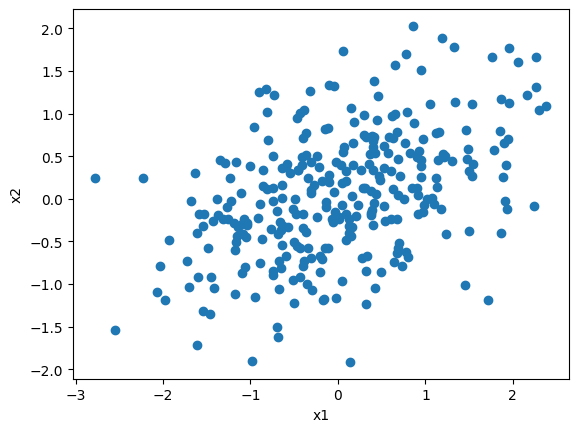

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

w = 0.3
n = 300
x1 = norm.rvs(loc=0, scale=1, size=n, random_state=0)
x2 = w * x1 + (1 - w) * norm.rvs(loc=0, scale=1, size=n, random_state=1)
X = np.append(x1.reshape(-1, 1), x2.reshape(-1, 1), axis=1)

fig, ax = plt.subplots()
ax.scatter(x1, x2)
ax.set(xlabel="x1", ylabel="x2")
fig.show()

固有値問題を解いて$\lambda$と$\boldsymbol{a}_j$を推定していく。

In [8]:
x_bar = X.mean(axis=0)
X_bar = X - x_bar
Sigma = (1 / n) * X_bar.T @ X_bar
lambdas, vectors = np.linalg.eig(Sigma)
print(f"""
λ={lambdas}
a1={vectors[:, 0].round(3)}
a2={vectors[:, 1].round(3)}
""")


λ=[1.17427995 0.37150396]
a1=[0.886 0.464]
a2=[-0.464  0.886]



主成分を表す固有ベクトルの傾きに直線をプロットすると以下の通り。

係数ベクトル$a_j$はノルムが1になるように制約がかけられているので、図にしても長さは同じ。

PC1方向の変換$s_1$は$a_j$に対して$\lambda_1 = 1.17$倍ということ。

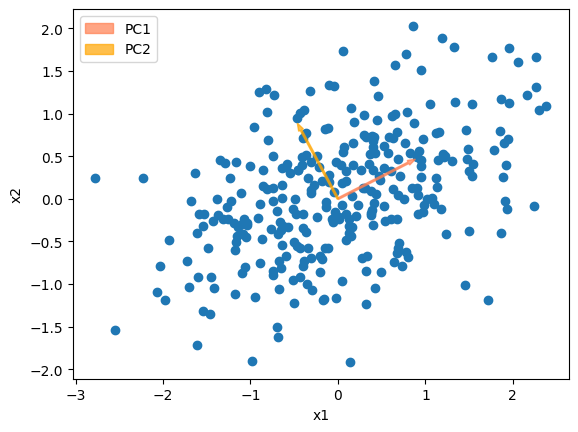

In [13]:
o = [0, 0]
a1 = vectors[:, 0]
a2 = vectors[:, 1]

fig, ax = plt.subplots()
ax.scatter(x1, x2)
ax.arrow(*o, *a1, width=0.02, color="coral", length_includes_head=True, alpha=0.7, label="PC1")
ax.arrow(*o, *a2, width=0.02, color="orange", length_includes_head=True, alpha=0.7, label="PC2")
ax.set(xlabel="x1", ylabel="x2")
ax.legend()
fig.show()

推定できた$\boldsymbol{a}$の任意の次元数を使って線形変換$\boldsymbol{s} = \boldsymbol{\bar{X}} \boldsymbol{a}$を作って散布図にするとこうなる

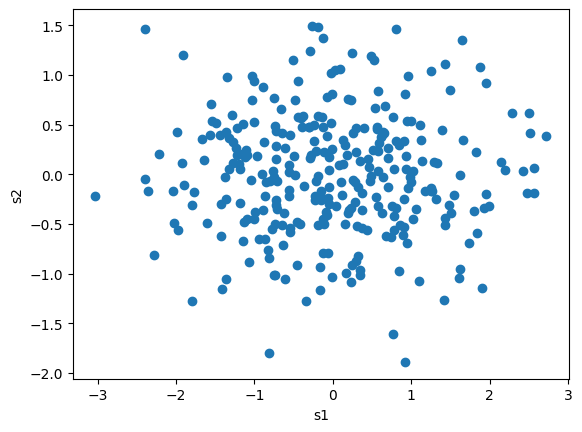

In [15]:
S = X_bar @ vectors

fig, ax = plt.subplots()
ax.scatter(S[:, 0], S[:, 1])
ax.set(xlabel="s1", ylabel="s2")
fig.show()